In [1]:
from torchvision import datasets
from torch.utils.data import DataLoader, random_split
from torchvision import transforms as T
import torch.nn.functional as F
from torch.optim import SGD, Adam
from torch import nn
import torch
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import tarfile
from torchvision.datasets.utils import download_url
import numpy as np
from imagenette_ds import load_imagenette
from resblock import ResBlock
from SEBlock import SE_Block
from model_learning import Training_valid_testing_model

In [2]:
train_loader, val_loader, test_loader, test_dataset = load_imagenette()

In [3]:
device = "cuda:2" if torch.cuda.is_available() else "cpu"

In [4]:
class Resnet34_body(nn.Module):
    def __init__(self):
        super().__init__()
        
        convblocks2 = nn.ModuleList([ResBlock(in_channels=64, out_channels=64) for i in range(3)])
        self.convblock2_n = nn.Sequential(*convblocks2)
        
        self.convblock3_1 = ResBlock(in_channels=64, out_channels=128, downsample=True)
        convblocks3 = nn.ModuleList([ResBlock(in_channels=128, out_channels=128) for i in range(3)])
        self.convblock3_n = nn.Sequential(*convblocks3)

        self.convblock4_1 = ResBlock(in_channels=128, out_channels=256, downsample=True)
        convblocks4 = nn.ModuleList([ResBlock(in_channels=256, out_channels=256) for i in range(5)])
        self.convblock4_n = nn.Sequential(*convblocks4)

        self.convblock5_1 = ResBlock(in_channels=256, out_channels=512, downsample=True)
        convblocks5 = nn.ModuleList([ResBlock(in_channels=512, out_channels=512) for i in range(2)])
        self.convblock5_n = nn.Sequential(*convblocks5)
        
        
    def forward(self, x):
        
        x = self.convblock2_n(x)
        
        x = self.convblock3_1(x)
        x = self.convblock3_n(x)
        
        x = self.convblock4_1(x)
        x = self.convblock4_n(x)
        
        x = self.convblock5_1(x)
        x = self.convblock5_n(x)
        
        return x

        
class ResNet34(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(nn.Conv2d(in_channels=3, out_channels=64, kernel_size=7, stride=2, padding=3),
                                     nn.ReLU(),
                                     nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
                                     Resnet34_body(),
                                     nn.AdaptiveAvgPool2d(1),
                                     nn.Flatten(),
                                     nn.Linear(512, 10))
        
    def forward(self, x):
        x = self.network(x)
        
        return x

In [5]:
model = ResNet34()
model = model.to(device)
num_epochs = 35
learning_rate = 0.001
loss_function = nn.CrossEntropyLoss()
optimizer = Adam(params=model.parameters(), lr=learning_rate)

In [6]:
model_learning = Training_valid_testing_model(model=model, loss_function=loss_function,
                                              optimizer=optimizer, num_epochs=num_epochs, train_loader=train_loader,
                                              val_loader=val_loader, test_loader=test_loader, test_dataset=test_dataset,
                                              device=device)

Epoch number is 1


592it [00:59,  9.94it/s]
183it [00:11, 15.67it/s]


CrossEntropyLoss train 2.0278860660823614
CrossEntropyLoss validation 2.0662059901190584
Validation accuracy: 30.188034188034187
Epoch number is 2


592it [00:58, 10.11it/s]
183it [00:09, 19.24it/s]


CrossEntropyLoss train 1.7523615775076118
CrossEntropyLoss validation 1.609514816211221
Validation accuracy: 43.282051282051285
Epoch number is 3


592it [00:58, 10.18it/s]
183it [00:11, 15.43it/s]


CrossEntropyLoss train 1.5793393412353218
CrossEntropyLoss validation 1.355039780908595
Validation accuracy: 54.8034188034188
Epoch number is 4


592it [00:59,  9.91it/s]
183it [00:11, 15.52it/s]


CrossEntropyLoss train 1.424741942032769
CrossEntropyLoss validation 1.3518592014990218
Validation accuracy: 55.794871794871796
Epoch number is 5


592it [00:59,  9.91it/s]
183it [00:11, 15.39it/s]


CrossEntropyLoss train 1.2791365781748616
CrossEntropyLoss validation 1.691957616903743
Validation accuracy: 47.042735042735046
Epoch number is 6


592it [00:59,  9.90it/s]
183it [00:11, 15.52it/s]


CrossEntropyLoss train 1.1477259645691595
CrossEntropyLoss validation 1.2574804897516803
Validation accuracy: 58.56410256410256
Epoch number is 7


592it [00:59,  9.98it/s]
183it [00:11, 15.54it/s]


CrossEntropyLoss train 1.081310708453325
CrossEntropyLoss validation 1.034267758004001
Validation accuracy: 67.07692307692308
Epoch number is 8


592it [00:59,  9.94it/s]
183it [00:11, 15.46it/s]


CrossEntropyLoss train 0.9963839668277148
CrossEntropyLoss validation 1.2426986591737779
Validation accuracy: 59.31623931623932
Epoch number is 9


592it [00:59,  9.91it/s]
183it [00:11, 15.56it/s]


CrossEntropyLoss train 0.9461830432551939
CrossEntropyLoss validation 1.0444350027647176
Validation accuracy: 66.4957264957265
Epoch number is 10


592it [00:59,  9.99it/s]
183it [00:11, 15.60it/s]


CrossEntropyLoss train 0.8800301835242961
CrossEntropyLoss validation 1.3698366860874365
Validation accuracy: 56.957264957264954
Epoch number is 11


592it [00:59, 10.00it/s]
183it [00:11, 15.59it/s]


CrossEntropyLoss train 0.8272257090067944
CrossEntropyLoss validation 0.869228914705782
Validation accuracy: 72.85470085470085
Epoch number is 12


592it [00:59,  9.94it/s]
183it [00:11, 15.50it/s]


CrossEntropyLoss train 0.7801361963958353
CrossEntropyLoss validation 0.9667908233371588
Validation accuracy: 70.01709401709402
Epoch number is 13


592it [00:59,  9.94it/s]
183it [00:11, 15.50it/s]


CrossEntropyLoss train 0.7517091270938918
CrossEntropyLoss validation 0.8848711534764597
Validation accuracy: 71.82905982905983
Epoch number is 14


592it [00:59,  9.95it/s]
183it [00:11, 15.51it/s]


CrossEntropyLoss train 0.7116765939202663
CrossEntropyLoss validation 0.8035679171319867
Validation accuracy: 75.04273504273505
Epoch number is 15


592it [00:59,  9.93it/s]
183it [00:11, 15.48it/s]


CrossEntropyLoss train 0.6694944995782666
CrossEntropyLoss validation 0.9056573915676992
Validation accuracy: 71.17948717948718
Epoch number is 16


592it [00:59,  9.93it/s]
183it [00:11, 15.48it/s]


CrossEntropyLoss train 0.6401973074251736
CrossEntropyLoss validation 0.9721501454955241
Validation accuracy: 71.28205128205128
Epoch number is 17


592it [00:59,  9.92it/s]
183it [00:11, 15.50it/s]


CrossEntropyLoss train 0.6010339753198866
CrossEntropyLoss validation 0.7988202089820403
Validation accuracy: 76.71794871794872
Epoch number is 18


592it [00:59,  9.97it/s]
183it [00:11, 15.51it/s]


CrossEntropyLoss train 0.5619275877252221
CrossEntropyLoss validation 0.7253422841348284
Validation accuracy: 78.11965811965813
Epoch number is 19


592it [00:59,  9.91it/s]
183it [00:11, 15.37it/s]


CrossEntropyLoss train 0.5337047108977631
CrossEntropyLoss validation 0.7101353646301832
Validation accuracy: 77.53846153846153
Epoch number is 20


592it [00:59,  9.90it/s]
183it [00:11, 15.50it/s]


CrossEntropyLoss train 0.5084209716123705
CrossEntropyLoss validation 0.7137984056534663
Validation accuracy: 78.5982905982906
Epoch number is 21


592it [00:59,  9.97it/s]
183it [00:11, 15.57it/s]


CrossEntropyLoss train 0.4964630147568076
CrossEntropyLoss validation 1.4231586299958776
Validation accuracy: 63.82905982905983
Epoch number is 22


592it [00:59,  9.99it/s]
183it [00:11, 15.57it/s]


CrossEntropyLoss train 0.4559750847669469
CrossEntropyLoss validation 0.7528394012014723
Validation accuracy: 77.5042735042735
Epoch number is 23


592it [00:59, 10.00it/s]
183it [00:11, 15.50it/s]


CrossEntropyLoss train 0.441209628844533
CrossEntropyLoss validation 0.7109247825510515
Validation accuracy: 78.90598290598291
Epoch number is 24


592it [00:59,  9.94it/s]
183it [00:11, 15.54it/s]


CrossEntropyLoss train 0.4125102973492766
CrossEntropyLoss validation 0.8002309056171955
Validation accuracy: 77.77777777777777
Epoch number is 25


592it [00:59,  9.90it/s]
183it [00:11, 15.55it/s]


CrossEntropyLoss train 0.3997785911480015
CrossEntropyLoss validation 0.7506035875549407
Validation accuracy: 78.15384615384616
Epoch number is 26


592it [00:59,  9.98it/s]
183it [00:11, 15.52it/s]


CrossEntropyLoss train 0.35446631835106557
CrossEntropyLoss validation 0.7416551045951296
Validation accuracy: 79.38461538461539
Epoch number is 27


592it [00:59,  9.97it/s]
183it [00:11, 15.48it/s]


CrossEntropyLoss train 0.3499523314011812
CrossEntropyLoss validation 0.8406048161206675
Validation accuracy: 76.85470085470085
Epoch number is 28


592it [00:59,  9.87it/s]
183it [00:11, 15.43it/s]


CrossEntropyLoss train 0.34608877044189973
CrossEntropyLoss validation 0.7112786111528756
Validation accuracy: 79.00854700854701
Epoch number is 29


592it [00:59,  9.92it/s]
183it [00:11, 15.53it/s]


CrossEntropyLoss train 0.30728869330581604
CrossEntropyLoss validation 0.708130169792172
Validation accuracy: 80.58119658119658
Epoch number is 30


592it [00:59,  9.94it/s]
183it [00:11, 15.48it/s]


CrossEntropyLoss train 0.2999793483570495
CrossEntropyLoss validation 0.9633519331939885
Validation accuracy: 74.2905982905983
Epoch number is 31


592it [00:59,  9.98it/s]
183it [00:11, 15.49it/s]


CrossEntropyLoss train 0.2780645484013508
CrossEntropyLoss validation 0.8109856698193837
Validation accuracy: 79.35042735042735
Epoch number is 32


592it [00:59,  9.95it/s]
183it [00:11, 15.49it/s]


CrossEntropyLoss train 0.268296641079753
CrossEntropyLoss validation 0.7172939790300822
Validation accuracy: 80.54700854700855
Epoch number is 33


592it [00:59,  9.93it/s]
183it [00:11, 15.45it/s]


CrossEntropyLoss train 0.24732964270515367
CrossEntropyLoss validation 0.8900237138805493
Validation accuracy: 76.27350427350427
Epoch number is 34


592it [00:59,  9.93it/s]
183it [00:11, 15.45it/s]


CrossEntropyLoss train 0.24136488468895942
CrossEntropyLoss validation 1.1283673999495194
Validation accuracy: 73.36752136752136
Epoch number is 35


592it [00:59,  9.94it/s]
183it [00:11, 15.50it/s]


CrossEntropyLoss train 0.22650131365878987
CrossEntropyLoss validation 0.7928690083650618
Validation accuracy: 79.86324786324786


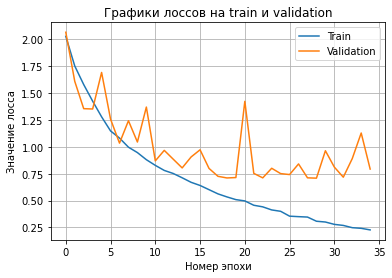

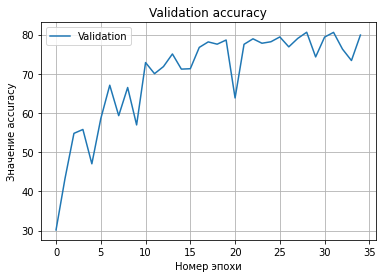

In [7]:
model_learning.learning_run()

In [8]:
model_path = 'resnet34_model_imagenette320'
torch.save(model.state_dict(), model_path)

In [9]:
test_accuracy = model_learning.testing_results()
print('Test accuracy:', test_accuracy)

Test accuracy: 81.0


Labels: French horn


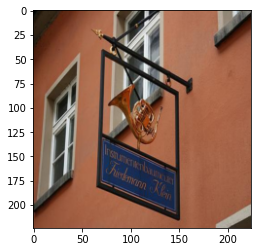

In [10]:
model_learning.predict_image(test_dataset[5][0])